In [8]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
Gamestop = yf.Ticker("GME")

In [11]:
gme_data = Gamestop.history(period='max')

In [103]:
gme_data.reset_index(inplace=True)
gme_data.tail()

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5403,5403,5403,2023-08-02 00:00:00-04:00,21.150000,21.150000,20.340000,20.830,2625800,0.0,0.0
5404,5404,5404,2023-08-03 00:00:00-04:00,20.879999,21.180000,20.740000,20.930,1318700,0.0,0.0
5405,5405,5405,2023-08-04 00:00:00-04:00,20.950001,21.889999,20.889999,20.980,2400500,0.0,0.0
5406,5406,5406,2023-08-07 00:00:00-04:00,20.900000,21.240000,20.480000,21.070,1440400,0.0,0.0
5407,5407,5407,2023-08-08 00:00:00-04:00,20.700001,20.725000,20.290001,20.479,485684,0.0,0.0


In [77]:
html_data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text

In [78]:
soup = BeautifulSoup(html_data,'html.parser')
soup.prettify()

In [146]:
GMR_Data = pd.DataFrame(columns=["Date","Revenue"])

for file in soup.find_all("tr"):
    rows = file.find_all("td")
    if len(rows) >= 2:
        Date = rows[0].text
        Revenue = rows[1].text.replace(',', '').replace('$', '')
        GMR_Data = GMR_Data.append({"Date": Date, "Revenue": Revenue}, ignore_index=True)
GMR_Data = GMR_Data.head(50)


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_16912\1040836671.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GMR_Data = GMR_Data.append({"Date": Date, "Revenue": Revenue}, ignore_index=True)
C:\Users\Microsoft\AppData\Local\Temp\ipykernel_16912\1040836671.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GMR_Data = GMR_Data.append({"Date": Date, "Revenue": Revenue}, ignore_index=True)
C:\Users\Microsoft\AppData\Local\Temp\ipykernel_16912\1040836671.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GMR_Data = GMR_Data.append({"Date": Date, "Revenue": Revenue}, ignore_index=True)
C:\Users\Microsoft\AppData\Local\Temp\ipykernel_16912\1040836671.py:8: FutureWarning: The frame.append method is deprecated and will be 

In [147]:
GMR_Data = GMR_Data.head(50)
GMR_Data

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


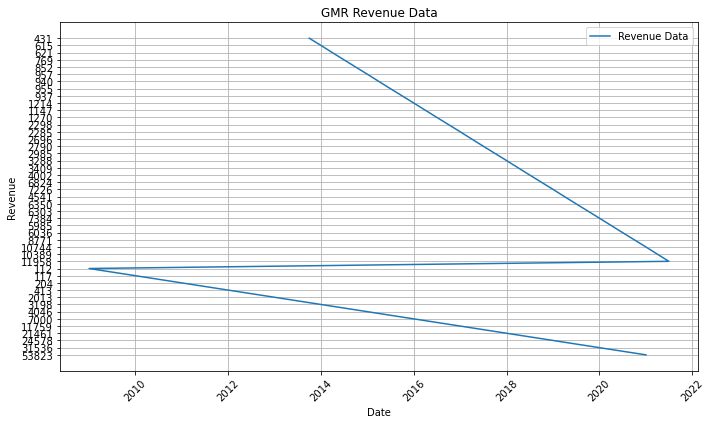

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(data, title):
    # Convert the 'Date' column to datetime objects for proper plotting
    data['Date'] = pd.to_datetime(data['Date'])

    # Filter data as needed
    data = data[data['Date'] <= '2021-06-30']

    # Plot the Data
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Revenue'], label='Revenue Data')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(f'{title} Revenue Data')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming you have GMR_Data DataFrame already
make_graph(GMR_Data, 'GMR')


In [95]:
Tesla_Stock = yf.Ticker("TSLA")
tesla_data = Tesla_Stock.history(period='max')
df= pd.DataFrame(tesla_data)
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [100]:
url = "http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_text = requests.get(url).text
soup = BeautifulSoup(html_text, "html.parser")

tesla_revenue = soup.find_all("tbody")[1]

tesla_Data = pd.DataFrame(columns=["Year", "Revenue"])

for row in tesla_revenue.find_all("tr"):
    cells = row.find_all("td")
    year = cells[0].text
    revenue = cells[1].text.replace(',', '').replace('$', '')  # Clean up revenue formatting
    tesla_Data = tesla_Data.append({"Year": year, "Revenue": revenue}, ignore_index=True)

tesla_Data

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_16912\4140272357.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_Data = tesla_Data.append({"Year": year, "Revenue": revenue}, ignore_index=True)
C:\Users\Microsoft\AppData\Local\Temp\ipykernel_16912\4140272357.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_Data = tesla_Data.append({"Year": year, "Revenue": revenue}, ignore_index=True)
C:\Users\Microsoft\AppData\Local\Temp\ipykernel_16912\4140272357.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_Data = tesla_Data.append({"Year": year, "Revenue": revenue}, ignore_index=True)
C:\Users\Microsoft\AppData\Local\Temp\ipykernel_16912\4140272357.py:13: FutureWarning: The frame.append method is depreca

,Year,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [101]:
tesla_Data['Revenue'].tail

<bound method NDFrame.tail of 0     21454
1     16934
2     18756
3     17719
4     13757
5     11958
6     10389
7     10744
8      8771
9      6036
10     5985
11     7384
12     6303
13     6350
14     4541
15     7226
16     6824
17     4002
18     3409
19     3288
20     2985
21     2790
22     2696
23     2285
24     2298
25     1270
26     1147
27     1214
28      937
29      955
30      940
31      957
32      852
33      769
34      621
35      615
36      431
37      405
38      562
39      306
40       50
41       27
42       30
43       39
44       58
45       58
46       49
47       36
48       31
49       28
50       21
51         
52       46
53       27
Name: Revenue, dtype: object>

In [106]:
#tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_Data[tesla_Data['Revenue'] != ""]

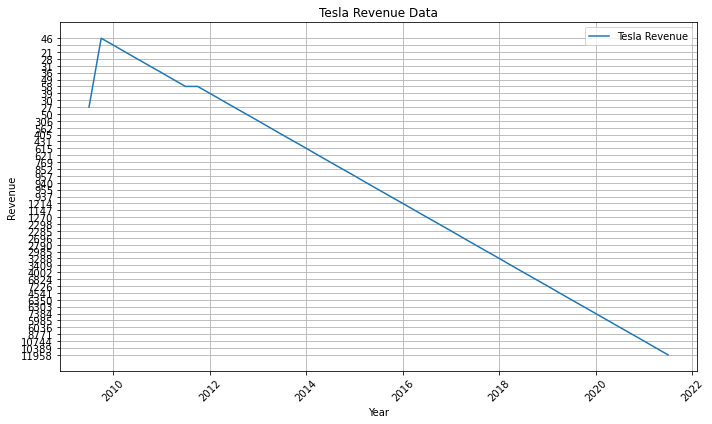

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

def make_graph(tesla_data, title):
    # Convert the 'Year' column to datetime objects for proper plotting
    tesla_data['Year'] = pd.to_datetime(tesla_data['Year'])

    # Filter data up to June 2021
    tesla_data = tesla_data[tesla_data['Year'] <= '2021-06-30']

    # Plot the Tesla Revenue Data
    plt.figure(figsize=(10, 6))
    plt.plot(tesla_data['Year'], tesla_data['Revenue'], label='Tesla Revenue')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.title(f'{title} Revenue Data')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming you have tesla_Data DataFrame already
make_graph(tesla_Data, 'Tesla')
